# Convolutional Neural Network to detect letters

## Import necessary libraries

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Dataset preview

In [198]:
# https://www.kaggle.com/datasets/crawford/emnist

In [199]:
X_train = pd.read_csv('./archive/emnist-letters-train.csv')
X_test = pd.read_csv('./archive/emnist-letters-test.csv')

In [200]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88799 entries, 0 to 88798
Columns: 785 entries, 23 to 0.415
dtypes: int64(785)
memory usage: 531.8 MB


In [201]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14799 entries, 0 to 14798
Columns: 785 entries, 1 to 0.557
dtypes: int64(785)
memory usage: 88.6 MB


In [202]:
X_train.describe()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
count,88799.000000,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,88799.000000,...,88799.0,88799.0,88799.0,88799.000000,88799.000000,88799.0,88799.0,88799.0,88799.0,88799.0
mean,13.519161,0.0,0.0,0.0,0.000011,0.003987,0.016757,0.024640,0.021487,0.017140,...,0.0,0.0,0.0,0.003041,0.000360,0.0,0.0,0.0,0.0,0.0
std,7.502906,0.0,0.0,0.0,0.003356,0.544042,1.547695,1.915987,1.803280,1.620203,...,0.0,0.0,0.0,0.823450,0.107386,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,7.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,14.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,20.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,26.000000,0.0,0.0,0.0,1.000000,107.000000,213.000000,217.000000,214.000000,216.000000,...,0.0,0.0,0.0,244.000000,32.000000,0.0,0.0,0.0,0.0,0.0


In [203]:
X_test.describe()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
count,14799.000000,14799.0,14799.0,14799.0,14799.0,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,...,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0,14799.0
mean,9.757348,0.0,0.0,0.0,0.0,0.000878,0.024123,0.044665,0.018717,0.020677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.344262,0.0,0.0,0.0,0.0,0.106863,1.413602,2.611553,1.100437,1.238699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,5.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,14.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,19.000000,0.0,0.0,0.0,0.0,13.000000,108.000000,208.000000,106.000000,126.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
X_train.isna().any().any() # Is X_train record that has no value?

False

In [205]:
X_test.isna().any().any() # Is X_test record that has no value?

False

In [206]:
image_size = 28

In [207]:
image_size*image_size

784

In [208]:
X_train.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
X_test.sample(5)

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
14726,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12490,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12409,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9932,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
965,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
X_test.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Extract train and test datasets

In [211]:
X_train[['23']] = X_train[['23']] - 1
X_train

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
np.unique(X_train[['23']])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [213]:
X_test[['1']] = X_test[['1']] - 1
X_test

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14794,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14795,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14796,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14797,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
np.unique(X_test[['1']])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [215]:
y_train = X_train[['23']]
y_train

,23
0,6
1,15
2,14
3,22
4,16
...,...
88794,0
88795,20
88796,0
88797,22


In [216]:
y_train[y_train['23'] == 0]

,23
28,0
31,0
34,0
37,0
58,0
...,...
88714,0
88744,0
88745,0
88794,0


In [217]:
y_train[y_train['23'] == 0].index

Index([   28,    31,    34,    37,    58,    68,    70,   223,   242,   275,
       ...
       88566, 88598, 88608, 88652, 88660, 88714, 88744, 88745, 88794, 88796],
      dtype='int64', length=3396)

In [218]:
y_train_unique = np.unique(y_train['23'].values)
y_train_unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

## Create letters mapping

In [219]:
df = pd.read_csv('./archive/emnist-letters-mapping.txt', sep=' ', names=['idx', 'low', 'upp'])
df.head()

,idx,low,upp
0,1,65,97
1,2,66,98
2,3,67,99
3,4,68,100
4,5,69,101


In [220]:
mapped_dct = dict(zip(df['idx'] - 1, df['low'].apply(chr)))
mapped_dct

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

## Display selected letters

In [221]:
def show_img_by_class(class_):
    rand_idx = np.random.choice(X_train.loc[X_train['23'] == class_].index, size=1)
    print('Chosen index: ', rand_idx[0])
    img = np.array(X_train.loc[rand_idx].drop(columns='23')).reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(mapped_dct[class_], size=20)
    plt.show()

In [222]:
X_train.loc[X_train['23'] == 0].index

Index([   28,    31,    34,    37,    58,    68,    70,   223,   242,   275,
       ...
       88566, 88598, 88608, 88652, 88660, 88714, 88744, 88745, 88794, 88796],
      dtype='int64', length=3396)

In [223]:
X_train.loc[X_train['23'] == 0]

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Chosen index:  16503


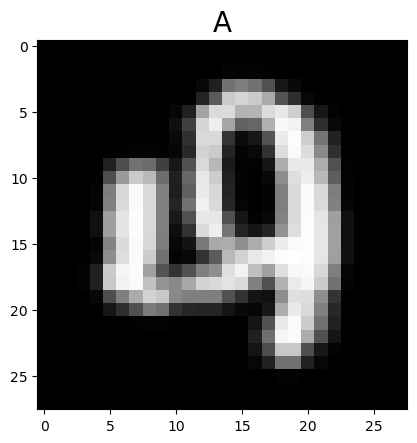

In [224]:
show_img_by_class(0)

Chosen index:  44298


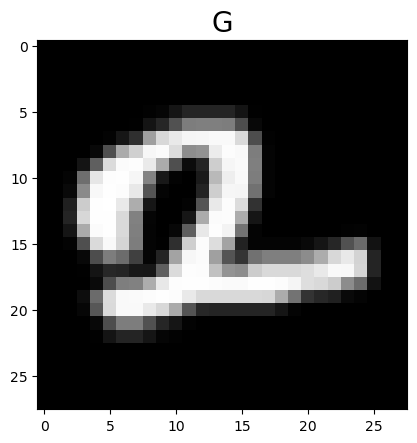

In [225]:
show_img_by_class(6)

Chosen index:  10197


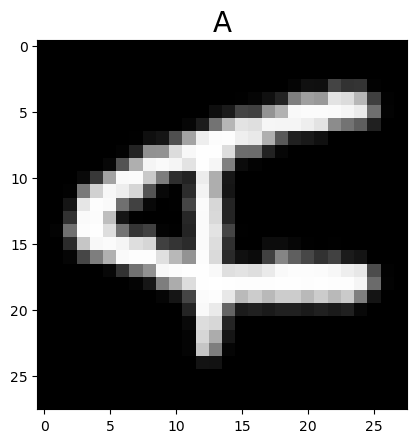

Chosen index:  83769


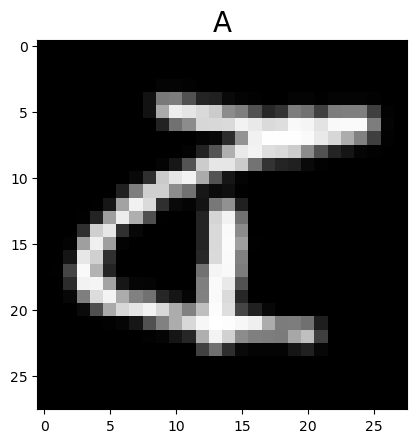

Chosen index:  81096


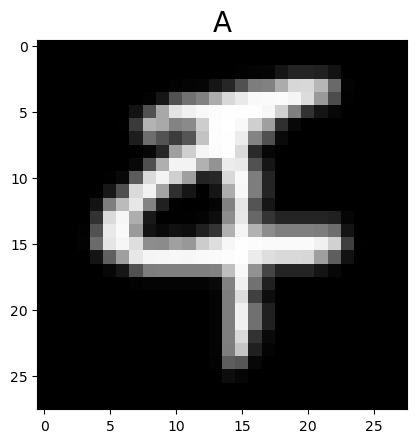

Chosen index:  75501


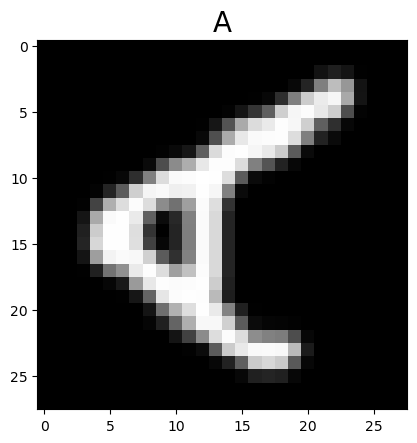

Chosen index:  10220


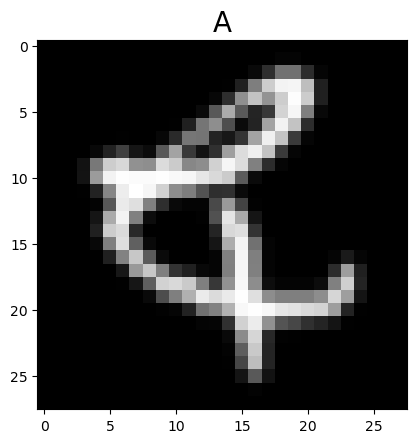

Chosen index:  60432


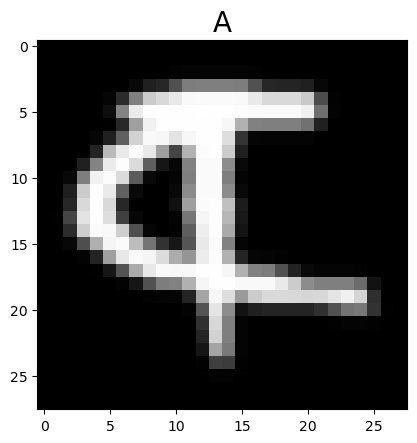

Chosen index:  48616


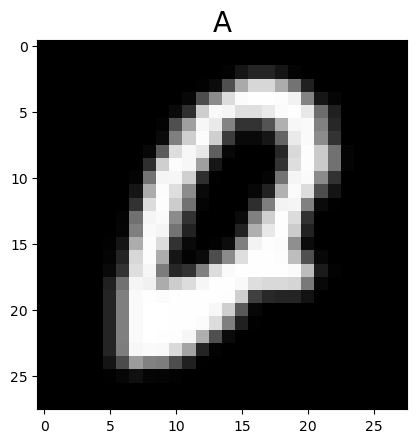

Chosen index:  16461


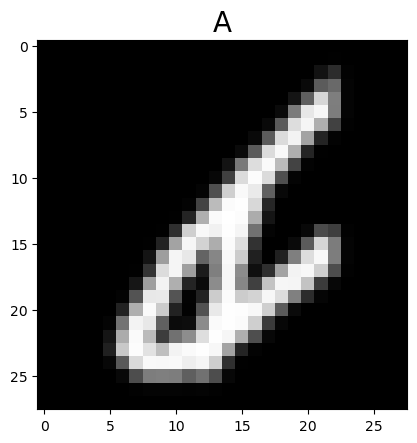

Chosen index:  53954


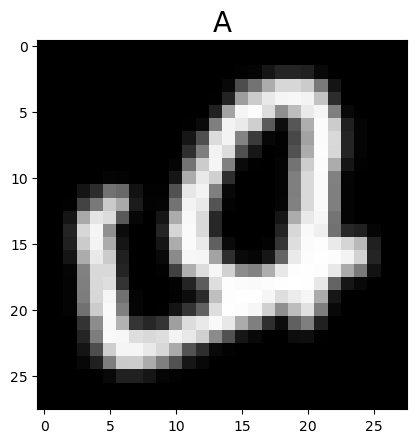

Chosen index:  27206


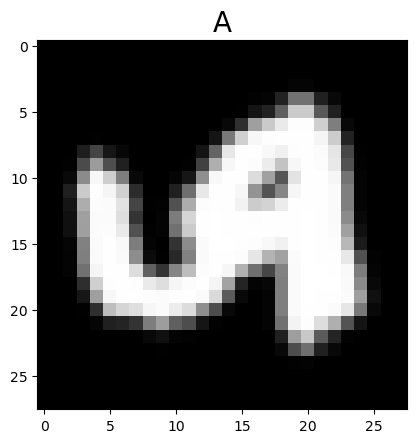

In [226]:
for _ in range(10):
    show_img_by_class(0)

Chosen index:  40970


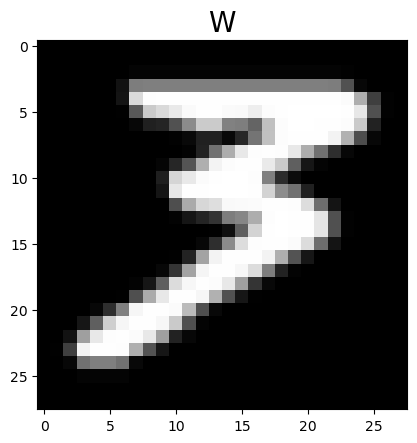

Chosen index:  32227


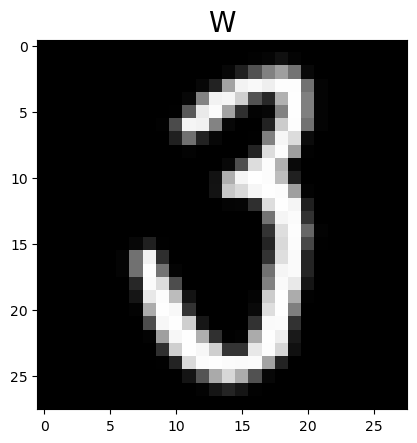

In [227]:
for _ in range(2):
    show_img_by_class(22)

## Analyze datasets

In [228]:
X_train.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
X_train = X_train.drop(columns='23')
X_train

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
len(np.unique(X_train.columns))

784

In [231]:
image_size*image_size

784

In [232]:
first = X_train.loc[28].values
first

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   4,   4,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   8,  46, 125, 113,  34,
         3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,  33, 126, 208, 249,
       243, 175,  67,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   5,  47, 163, 244,
       254, 254, 254, 250, 170,  21,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  47, 195,
       247, 254, 250, 227, 247, 254, 216,  38,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

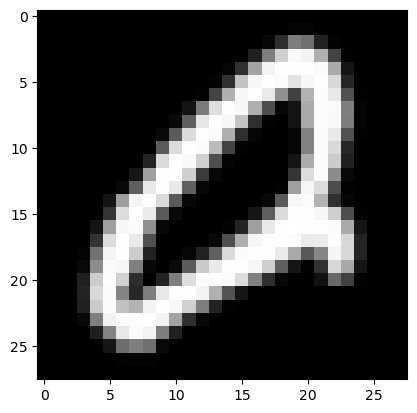

In [233]:
plt.imshow(first.reshape(image_size, image_size), cmap='gray')
plt.show()

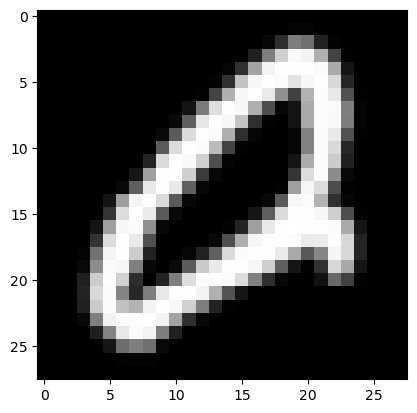

In [234]:
plt.imshow(X_train.loc[28].values.reshape(image_size, image_size), cmap='gray')
plt.show()

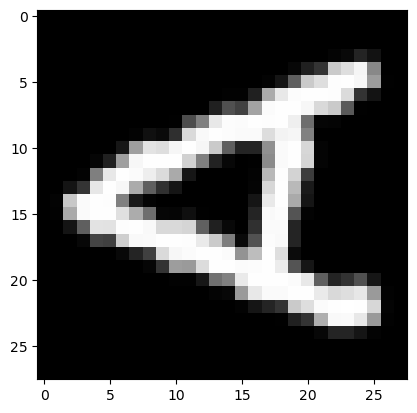

In [235]:
plt.imshow(X_train.loc[31].values.reshape(image_size, image_size), cmap='gray')
plt.show()

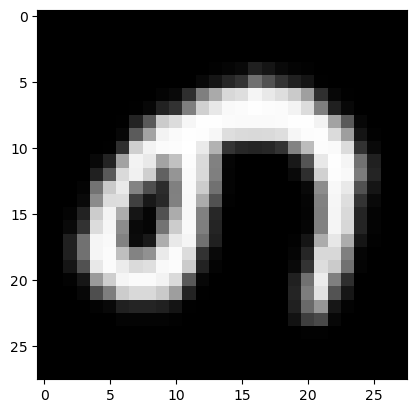

In [236]:
plt.imshow(X_train.loc[63].values.reshape(image_size, image_size), cmap='gray')
plt.show()

In [237]:
y_train

,23
0,6
1,15
2,14
3,22
4,16
...,...
88794,0
88795,20
88796,0
88797,22


In [238]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [239]:
X_train.sample(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
87102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
X_test.sample(5)

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
6279,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5486,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11661,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14414,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5657,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
y_test = X_test[['1']]
y_test

,1
0,0
1,0
2,0
3,0
4,0
...,...
14794,18
14795,18
14796,18
14797,18


In [242]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [243]:
X_test = X_test.drop(columns='1')
X_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scale data

In [244]:
X_train = X_train / 255
X_test = X_test / 255

In [245]:
X_train.shape, X_test.shape

((88799, 784), (14799, 784))

In [246]:
X_train = X_train.to_numpy().reshape(-1, 28, 28, 1)
X_test = X_test.to_numpy().reshape(-1, 28, 28, 1)

In [247]:
X_train.shape, X_test.shape

((88799, 28, 28, 1), (14799, 28, 28, 1))

In [248]:
len(mapped_dct.keys())

26

In [249]:
y_train.to_numpy()

array([[ 6],
       [15],
       [14],
       ...,
       [ 0],
       [22],
       [11]])

## Create and train neural network

In [250]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3),  activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax'),
])

In [251]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [252]:
X_train.shape, y_train.to_numpy().flatten().shape

((88799, 28, 28, 1), (88799,))

In [253]:
history = model.fit(X_train, y_train.to_numpy().flatten(), verbose=1, epochs=10)

Epoch 1/10
2775/2775 [==============================] - 30s 11ms/step - loss: 0.5113 - accuracy: 0.8397
Epoch 2/10
2775/2775 [==============================] - 42s 15ms/step - loss: 0.2494 - accuracy: 0.9167
Epoch 3/10
2775/2775 [==============================] - 41s 15ms/step - loss: 0.1993 - accuracy: 0.9314
Epoch 4/10
2775/2775 [==============================] - 1371s 494ms/step - loss: 0.1684 - accuracy: 0.9402
Epoch 5/10
2775/2775 [==============================] - 35s 13ms/step - loss: 0.1459 - accuracy: 0.9478
Epoch 6/10
2775/2775 [==============================] - 33s 12ms/step - loss: 0.1282 - accuracy: 0.9523
Epoch 7/10
2775/2775 [==============================] - 49s 18ms/step - loss: 0.1148 - accuracy: 0.9561
Epoch 8/10
2775/2775 [==============================] - 40s 14ms/step - loss: 0.1024 - accuracy: 0.9603
Epoch 9/10
2775/2775 [==============================] - 40s 14ms/step - loss: 0.0921 - accuracy: 0.9633
Epoch 10/10
2775/2775 [==============================] - 37s 

In [254]:
loss, acc = model.evaluate(X_test, y_test.to_numpy().flatten())

463/463 [==============================] - 3s 6ms/step - loss: 0.3029 - accuracy: 0.9188


In [255]:
print(f'Loss: \033[92m{np.mean(loss)}\033[0m\nAccuracy: \033[92m{acc}\033[0m')

Loss: 0.30293160676956177
Accuracy: 0.9188458919525146


In [256]:
history.history

{'loss': [0.5113004446029663,
  0.24936005473136902,
  0.19931380450725555,
  0.1684482991695404,
  0.14587347209453583,
  0.12816861271858215,
  0.11479397118091583,
  0.10242249071598053,
  0.0920584574341774,
  0.08673053234815598],
 'accuracy': [0.8396716117858887,
  0.9167333245277405,
  0.931429386138916,
  0.9401907920837402,
  0.947837233543396,
  0.9523417949676514,
  0.9561368823051453,
  0.9602810740470886,
  0.9632991552352905,
  0.965146005153656]}

## Display model accuracy and loss

In [257]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

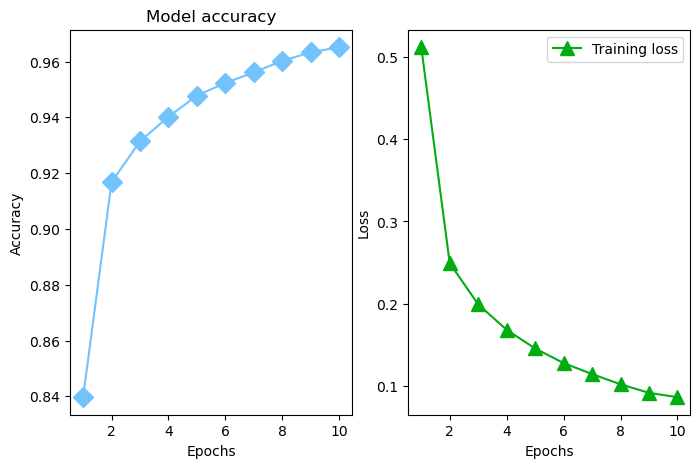

In [258]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.title('Model accuracy')
plt.plot(epochs, accuracy, color='#72c2fb', marker='D', markersize=10, label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color='#03ac13', marker='^', markersize=10, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

In [259]:
y_test.to_numpy().flatten()

array([ 0,  0,  0, ..., 18, 18, 18])

In [260]:
model.save('emnist_model.keras')

In [261]:
model = tf.keras.models.load_model('emnist_model.keras')

## Predict values

In [262]:
def check_prediction(num, save_fig=False):
    pred = np.argmax(model.predict(X_test[num].reshape(1, 28, 28, 1)))
    real_label = y_test.to_numpy().flatten()[num]
    title = f'Predicted: {mapped_dct[pred]}, Real: {mapped_dct[real_label]}'
    plt.title(title)
    plt.imshow(X_test[num], cmap='gray')
    if save_fig:
        plt.savefig(f'figure_{num}.png')
    plt.show()

In [263]:
mapped_dct[np.argmax(model.predict(X_test[0].reshape(1, 28, 28, 1)))]

1/1 [==============================] - 0s 66ms/step


'A'

1/1 [==============================] - 0s 18ms/step


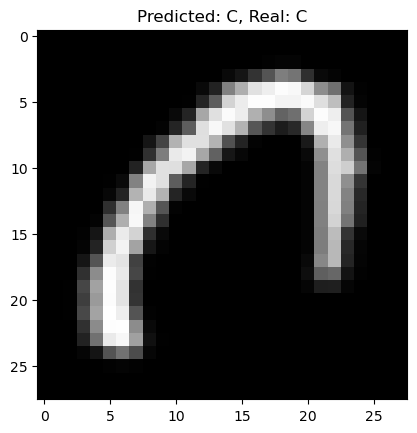

In [264]:
check_prediction(2222, save_fig=True)

1/1 [==============================] - 0s 22ms/step


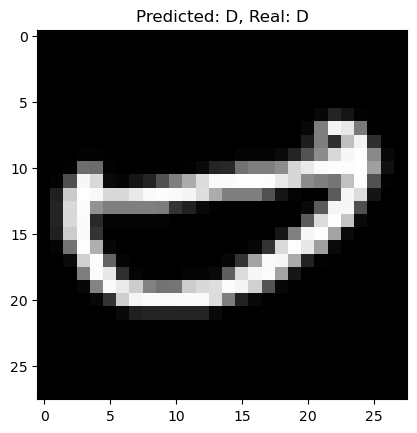

In [265]:
check_prediction(2414, save_fig=True)